# Error Analysis

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d

from skimage.transform import iradon, iradon_sart

from scipy.ndimage import sobel
from scipy.ndimage import binary_dilation

%matplotlib inline

In [2]:
# import of the phantom library which contain the phantom class
import exact_sinogram as esin

In [3]:
def normalize(x):
    return (x-x.min())/(x.max() - x.min())

In [4]:
def gradient(A):
    return np.sqrt(sobel(A, axis=0)**2 + sobel(A, axis=-1)**2)

In [5]:
def ndilate(A,n):
    for i in range(n):
        A = binary_dilation(A)
    return A

In [30]:
def error(X,Targ,p = np.inf):
    Mask = ndilate(gradient(P)>.5,2)
    Error = X-Targ
    Error[Mask==1] = 0
    Error[P==0] = 0
    return np.linalg.norm(Error,p)

# Creation of the Phantom

In [39]:

circle = True
phantom_type = 'modified_shepp_logan'
#  phantom_type : 'ellipses' (or 'shepp_logan') , 'modified_shepp_logan', 'squares', 'rectangles'
n_points = 300;   # number of pixels

Phm = esin.Phantom(phantom_type = phantom_type, circle = circle)    

P = Phm.get_phantom(N = n_points)

# Calculation of the Sinograms

In [40]:
# Creation of the vector theta of the angles on which the Radon is calculated
theta_vec_deg = np.linspace(0, 359, 360)
theta_vec_rad = np.deg2rad(theta_vec_deg)
analytical_sinogram = Phm.get_sinogram(N = n_points, theta_vec = theta_vec_rad)

# Calculation of the Sinogram with the Aproximated formula
sinogram = esin.my_radon(P, theta=theta_vec_deg)

# Backprojection with the iradon function of the library Skimage

In [41]:
P_an = normalize(iradon(analytical_sinogram, theta = theta_vec_deg, circle=circle))

P_inv = normalize(iradon(sinogram, theta= theta_vec_deg , circle=circle))

# Analysis of the results

In [42]:
error(P_an, P,2)

5.184230291532019

In [43]:
error(P_inv, P,2)

4.131040429668985

In [52]:
Mask = ndilate(gradient(P)>.1,4)

max(|P-P_an|) =  0.06500454927103017


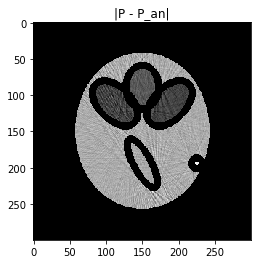

In [53]:
##############################################################################
# Comparison of the recalculated Phantom images
deltaP = np.abs(P-P_an)
deltaP[Mask] = 0
deltaP[P==0] = 0
plt.imshow(deltaP, cmap = cm.gray)
plt.title('|P - P_an|')
#errors:
print('max(|P-P_an|) = ', np.max(deltaP))
##############################################################################

max(|P-P_inv|) =  0.05473199291067618


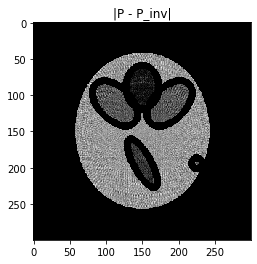

In [54]:
##############################################################################
# Comparison of the recalculated Phantom images
deltaP = np.abs(P-P_inv)
deltaP[Mask] = 0
deltaP[P==0] = 0
plt.imshow(deltaP, cmap = cm.gray)
plt.title('|P - P_inv|')
#errors:
print('max(|P-P_inv|) = ', np.max(deltaP))
##############################################################################

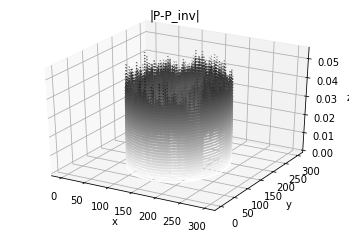

In [55]:
##############################################################################
# 3D Plot of the error of the recalculated Phantom with the approximated radon/iradon
X, Y = np.meshgrid(np.arange(300), np.arange(300))
Z = np.abs(P-P_inv)
Z[Mask] = 0
Z[P==0] = 0
fig = plt.figure();
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
plt.title('|P-P_inv|')
plt.show()
##############################################################################

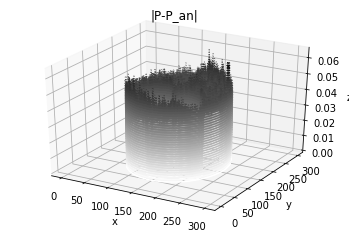

In [56]:
##############################################################################
# 3D Plot of the error of the recalculated Phantom with the analytical radon/iradon
X, Y = np.meshgrid(np.arange(300), np.arange(300))
Z = np.abs(P_an-P)
Z[Mask] = 0
Z[P==0] = 0
plt.figure();
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
plt.title('|P-P_an|')
plt.show()
##############################################################################